In [1]:
import pandas as pd

df = pd.read_csv("marketing_data.csv")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [4]:
print(df.columns.tolist())

['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Complain', 'Country']


In [5]:
df.columns = df.columns.str.strip()

In [6]:
df[['Dt_Customer', 'Income']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Dt_Customer  2240 non-null   object
 1   Income       2216 non-null   object
dtypes: object(2)
memory usage: 35.1+ KB


In [7]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format="%m/%d/%y")

In [9]:
df['Income'] = df['Income'].replace('[\$,]', '', regex=True).astype(float)

In [10]:
df[['Dt_Customer', 'Income']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Dt_Customer  2240 non-null   datetime64[ns]
 1   Income       2216 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 35.1 KB


In [11]:
df['Income'] = df.groupby(['Education', 'Marital_Status'])['Income'].transform(
    lambda x: x.fillna(x.mean())
)

In [12]:
df['Income'].isna().sum()

np.int64(0)

In [13]:
print("Education:", df['Education'].unique())
print("Marital_Status:", df['Marital_Status'].unique())

Education: ['Graduation' 'PhD' '2n Cycle' 'Master' 'Basic']
Marital_Status: ['Divorced' 'Single' 'Married' 'Together' 'Widow' 'YOLO' 'Alone' 'Absurd']


In [14]:
valid_statuses = ['Single', 'Married', 'Divorced', 'Together', 'Widow']

df['Marital_Status'] = df['Marital_Status'].apply(
    lambda x: x if x in valid_statuses else 'Other'
)

In [15]:
df['Marital_Status'].unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow', 'Other'],
      dtype=object)

In [16]:
df['Total_Children'] = df['Kidhome'] + df['Teenhome']

In [18]:
df['Age'] = 2014 - df['Year_Birth']

In [19]:
spend_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 
              'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

df['Total_Spending'] = df[spend_cols].sum(axis=1)

In [20]:
df[['Total_Children', 'Age', 'Total_Spending']].head()

,Total_Children,Age,Total_Spending
0,0,44,1190
1,0,53,577
2,1,56,251
3,2,47,11
4,1,25,91


In [21]:
df['Total_Purchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

In [22]:
df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'Total_Purchases']].head()

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Total_Purchases
0,4,4,6,14
1,7,3,7,17
2,3,2,5,10
3,1,0,2,3
4,3,1,2,6


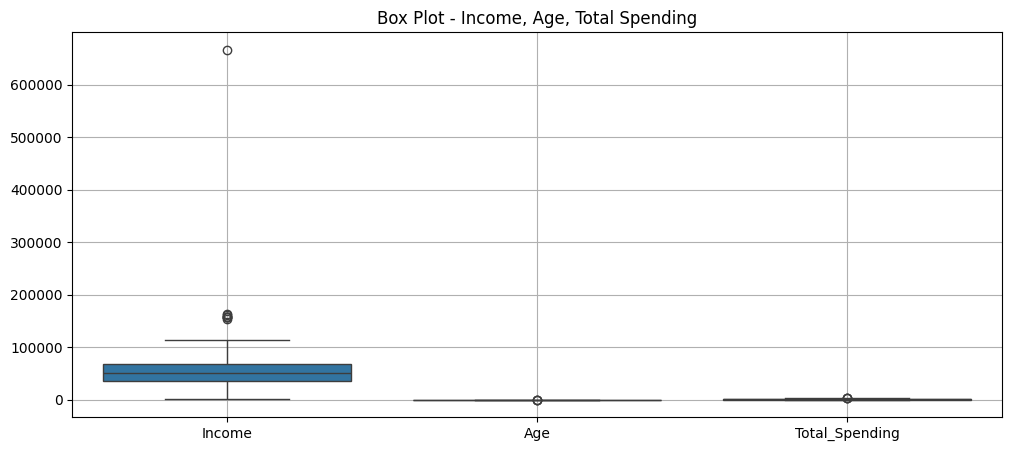

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
sns.boxplot(data=df[['Income', 'Age', 'Total_Spending']])
plt.title('Box Plot - Income, Age, Total Spending')
plt.grid(True)
plt.show()

In [24]:
income_cap = df['Income'].quantile(0.99)
df['Income'] = df['Income'].apply(lambda x: min(x, income_cap))

In [25]:
df = df[(df['Age'] >= 18) & (df['Age'] <= 90)]

In [27]:
spend_cap = df['Total_Spending'].quantile(0.99)
df.loc[:, 'Total_Spending'] = df['Total_Spending'].apply(lambda x: min(x, spend_cap))

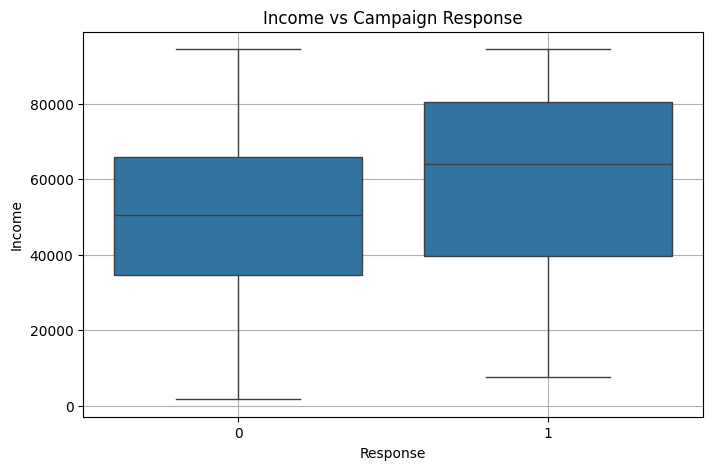

In [30]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Response', y='Income', data=df)
plt.title('Income vs Campaign Response')
plt.grid(True)
plt.show()

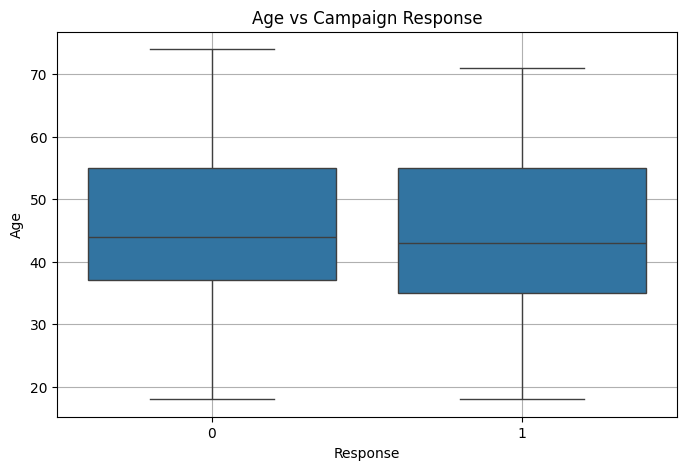

In [31]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Response', y='Age', data=df)
plt.title('Age vs Campaign Response')
plt.grid(True)
plt.show()

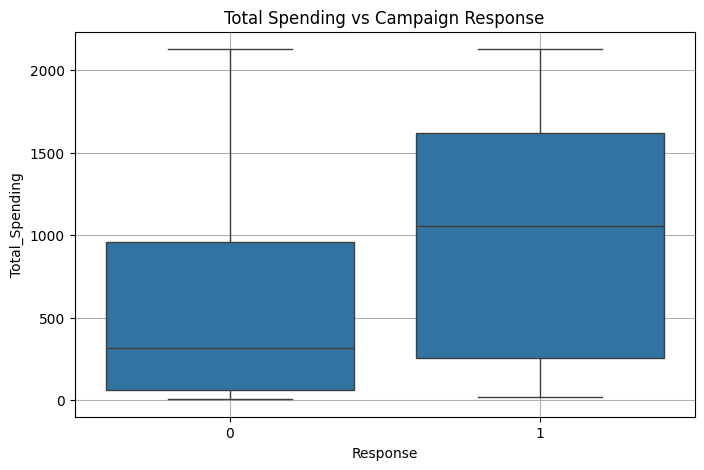

In [32]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Response', y='Total_Spending', data=df)
plt.title('Total Spending vs Campaign Response')
plt.grid(True)
plt.show()

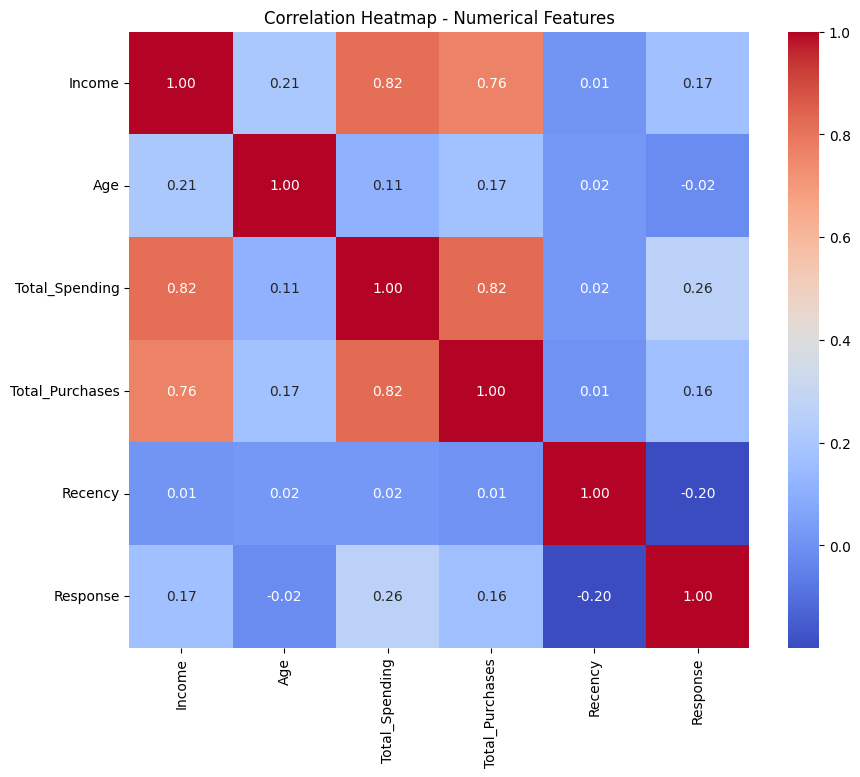

In [33]:
plt.figure(figsize=(10, 8))
numerical_cols = ['Income', 'Age', 'Total_Spending', 'Total_Purchases', 'Recency', 'Response']
corr = df[numerical_cols].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap - Numerical Features')
plt.show()

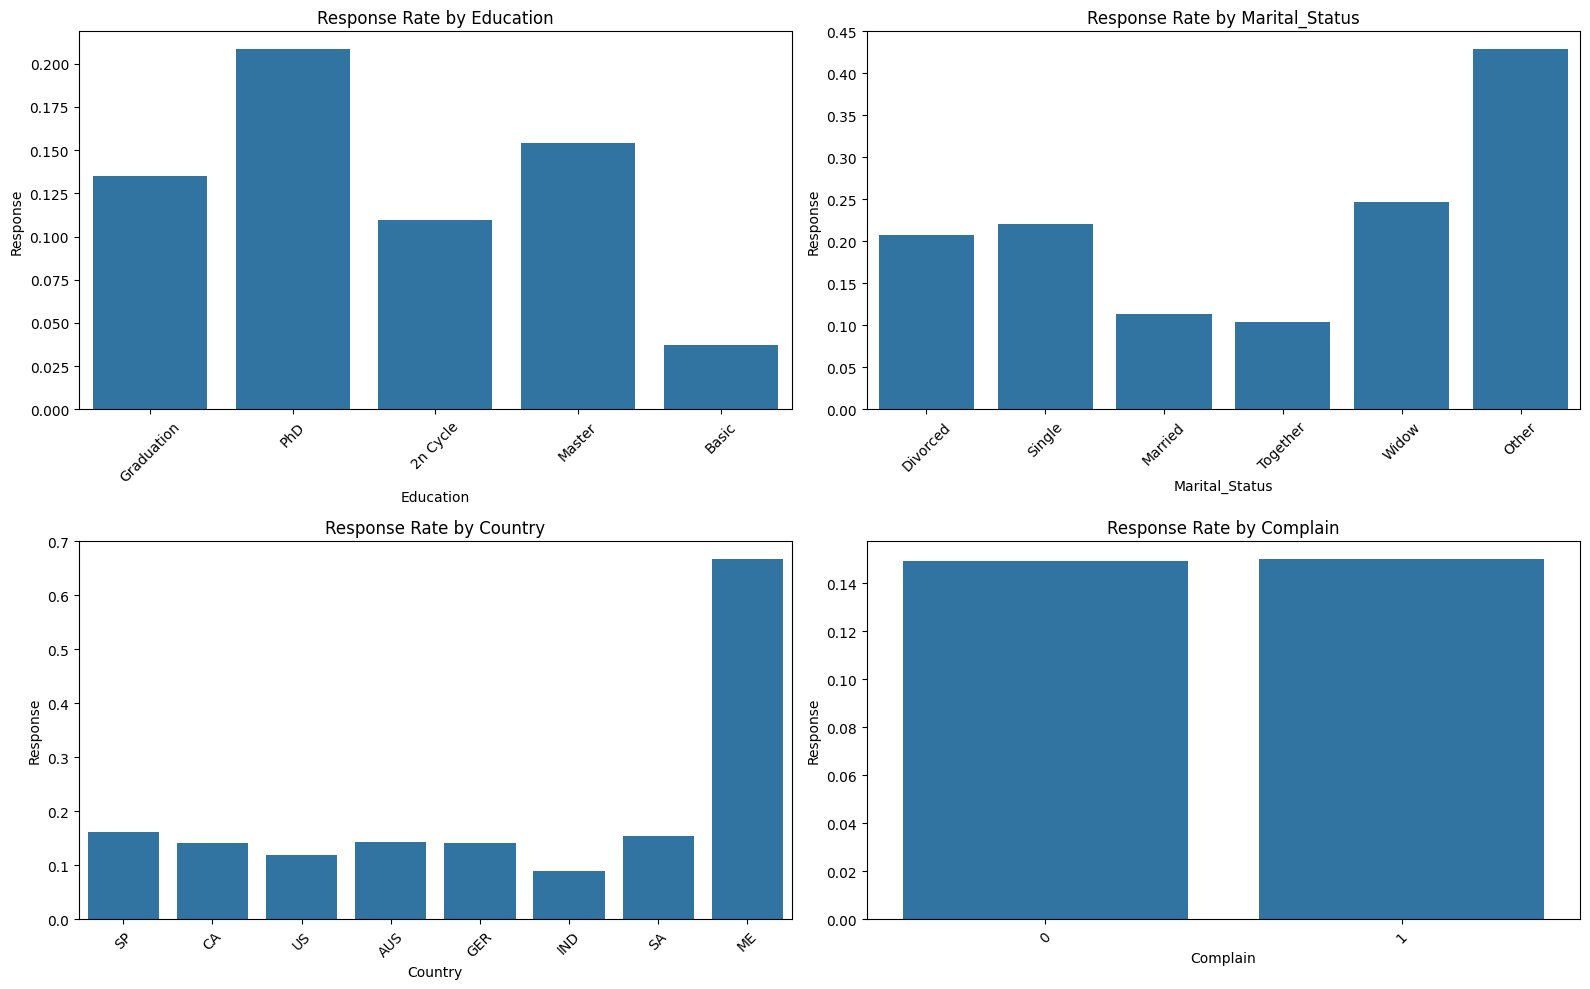

In [35]:
categorical_cols = ['Education', 'Marital_Status', 'Country', 'Complain']

plt.figure(figsize=(16, 10))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 2, i)
    sns.barplot(data=df, x=col, y='Response', estimator='mean', errorbar=None)
    plt.xticks(rotation=45)
    plt.title(f'Response Rate by {col}')

plt.tight_layout()
plt.show()

In [37]:
features = ['Income', 'Age', 'Total_Spending', 'Total_Purchases', 'Recency', 'Education', 'Marital_Status']

df_model = pd.get_dummies(df[features], drop_first=True)

df_model.head()

,Income,Age,Total_Spending,Total_Purchases,Recency,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Married,Marital_Status_Other,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,84835.0,44,1190.0,14,0,False,True,False,False,False,False,False,False,False
1,57091.0,53,577.0,17,0,False,True,False,False,False,False,True,False,False
2,67267.0,56,251.0,10,0,False,True,False,False,True,False,False,False,False
3,32474.0,47,11.0,3,0,False,True,False,False,False,False,False,True,False
4,21474.0,25,91.0,6,0,False,True,False,False,False,False,True,False,False


In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_model)

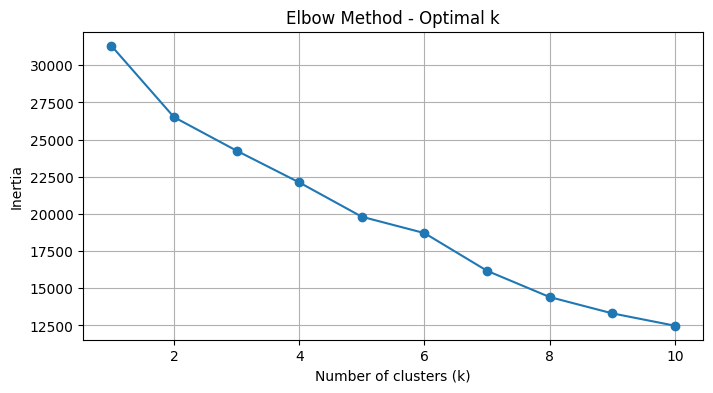

In [39]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method - Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [41]:
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
df.loc[:, 'Cluster'] = kmeans_final.fit_predict(scaled_data)

print(df['Cluster'].value_counts())

Cluster
2    1172
1     988
0      77
Name: count, dtype: int64


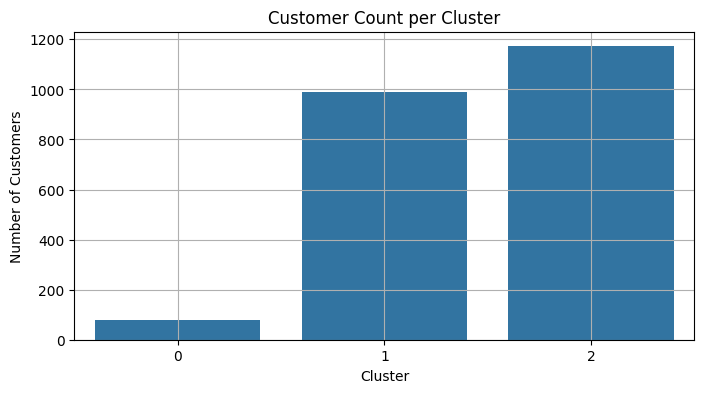

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Cluster')
plt.title('Customer Count per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()

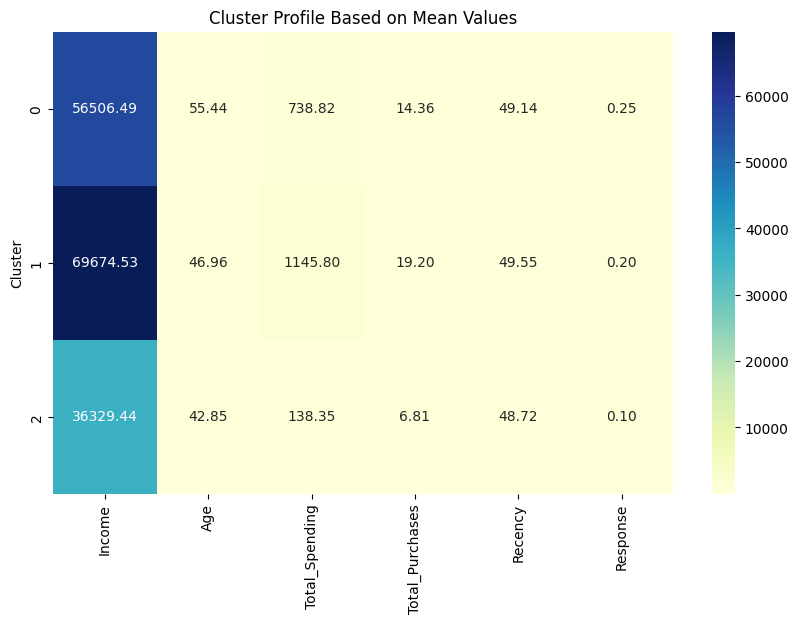

In [43]:
profile_cols = ['Income', 'Age', 'Total_Spending', 'Total_Purchases', 'Recency', 'Response']
cluster_profile = df.groupby('Cluster')[profile_cols].mean().round(2)

import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(cluster_profile, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Cluster Profile Based on Mean Values")
plt.ylabel("Cluster")
plt.show()

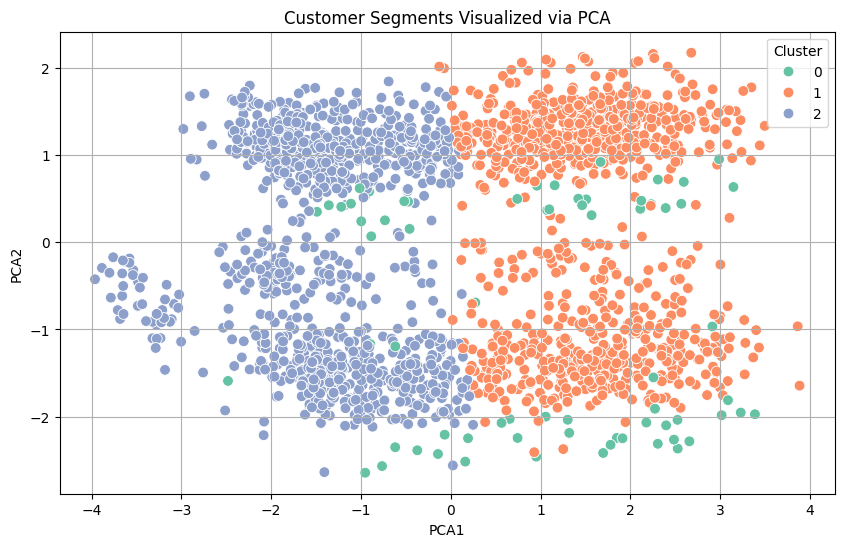

In [44]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

pca_df = pd.DataFrame(data=pca_components, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = df['Cluster'].values

plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=60)
plt.title("Customer Segments Visualized via PCA")
plt.grid(True)
plt.show()

In [45]:
df.to_csv("segmented_customers.csv", index=False)
print("Export complete. File saved as segmented_customers.csv")

Export complete. File saved as segmented_customers.csv
